# CODING TASK #1: IMPORT LIBRARIES AND DATASETS

In [14]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [16]:
# AutoGluon is modularized into sub-modules for: 1. Tabular, 2. text, 3.Images
from autogluon.tabular import TabularDataset, TabularPredictor

In [17]:
insurance_df = pd.read_csv('insurance.csv')

In [18]:
insurance_df

age     sex     bmi  children smoker     region      charges
0      19  female  27.900         0    yes  southwest  16884.92400
1      18    male  33.770         1     no  southeast   1725.55230
2      28    male  33.000         3     no  southeast   4449.46200
3      33    male  22.705         0     no  northwest  21984.47061
4      32    male  28.880         0     no  northwest   3866.85520
...   ...     ...     ...       ...    ...        ...          ...
1333   50    male  30.970         3     no  northwest  10600.54830
1334   18  female  31.920         0     no  northeast   2205.98080
1335   18  female  36.850         0     no  southeast   1629.83350
1336   21  female  25.800         0     no  southwest   2007.94500
1337   61  female  29.070         0    yes  northwest  29141.36030

[1338 rows x 7 columns]

**PRACTICE OPPORTUNITY #1 [OPTIONAL]:** 
- **How many unique regions do we have in the insurance_df DataFrame?**

In [19]:
unique_regions = insurance_df["region"].unique()
[print(region) for region in unique_regions]

southwest
southeast
northwest
northeast


[None, None, None, None]

In [20]:
unique_region_count = len(insurance_df["region"].unique())
unique_region_count

4

# CODING TASK #2: PERFORM EXPLORATORY DATA ANALYSIS 

In [21]:
# Explore the first five rows in the DataFrame
insurance_df.head(3)

age     sex    bmi  children smoker     region     charges
0   19  female  27.90         0    yes  southwest  16884.9240
1   18    male  33.77         1     no  southeast   1725.5523
2   28    male  33.00         3     no  southeast   4449.4620

In [22]:
# Explore the last five rows in the DataFrame
insurance_df.tail()

age     sex    bmi  children smoker     region     charges
1333   50    male  30.97         3     no  northwest  10600.5483
1334   18  female  31.92         0     no  northeast   2205.9808
1335   18  female  36.85         0     no  southeast   1629.8335
1336   21  female  25.80         0     no  southwest   2007.9450
1337   61  female  29.07         0    yes  northwest  29141.3603

In [23]:
# Generate statistical summary
insurance_df.describe()

age          bmi     children       charges
count  1338.000000  1338.000000  1338.000000   1338.000000
mean     39.207025    30.663397     1.094918  13270.422265
std      14.049960     6.098187     1.205493  12110.011237
min      18.000000    15.960000     0.000000   1121.873900
25%      27.000000    26.296250     0.000000   4740.287150
50%      39.000000    30.400000     1.000000   9382.033000
75%      51.000000    34.693750     2.000000  16639.912515
max      64.000000    53.130000     5.000000  63770.428010

In [24]:
# Obtain dataset information
insurance_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [25]:
# any null data? Nope | We can also calculate this from the Non-Null count in df.info()
insurance_df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [26]:
# Grouping by region to see any relationship between region and charges
# Seems like south east region has the highest charges and body mass index
df_region = insurance_df.groupby(by='region').mean(numeric_only=True) #ensure we're calculating the mean of numeric values only
df_region

age        bmi  children       charges
region                                                 
northeast  39.268519  29.173503  1.046296  13406.384516
northwest  39.196923  29.199785  1.147692  12417.575374
southeast  38.939560  33.355989  1.049451  14735.411438
southwest  39.455385  30.596615  1.141538  12346.937377

**PRACTICE OPPORTUNITY #2 [OPTIONAL]:**
- **Group data by 'age' and examine the relationship between 'age' and 'charges'**

In [27]:
df_age = insurance_df.groupby(by='age').mean(numeric_only=True)
df_age.head()

bmi  children       charges
age                                   
18   31.326159  0.449275   7086.217556
19   28.596912  0.426471   9747.909335
20   30.632759  0.862069  10159.697736
21   28.185714  0.785714   4730.464330
22   31.087679  0.714286  10012.932802

In [28]:
# dir(df_age)

In [29]:
df_age_sorted = df_age.sort_values(by='charges', ascending=True)
df_age_sorted.head()

bmi  children      charges
age                                  
21   28.185714  0.785714  4730.464330
26   29.428929  1.071429  6133.825309
18   31.326159  0.449275  7086.217556
38   28.996600  1.480000  8102.733674
28   29.482143  1.285714  9069.187564

In [30]:
df_age_sorted.index

Index([21, 26, 18, 38, 28, 32, 41, 19, 25, 22, 20, 31, 29, 24, 35, 34, 40, 39,
       27, 36, 33, 23, 49, 30, 42, 58, 46, 48, 45, 56, 50, 51, 44, 53, 55, 57,
       47, 37, 52, 54, 59, 62, 43, 63, 60, 61, 64],
      dtype='int64', name='age')

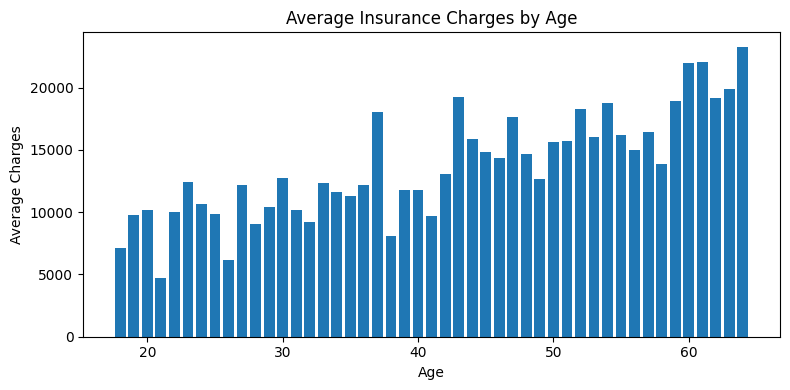

In [31]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 4))
plt.bar(df_age_sorted.index, df_age_sorted['charges'])
plt.xlabel('Age')
plt.ylabel('Average Charges')
plt.title('Average Insurance Charges by Age')
plt.tight_layout()
plt.show()

# CODING TASK #3: PERFORM DATA VISUALIZATION

<Axes: >

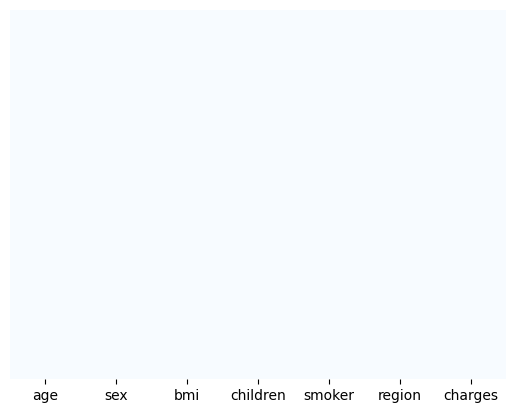

In [32]:
# check if there are any Null values - isNull visualisation
sns.heatmap(insurance_df.isnull(), yticklabels = False, cbar = False, cmap="Blues")

In [33]:
# check if there are any Null values
insurance_df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

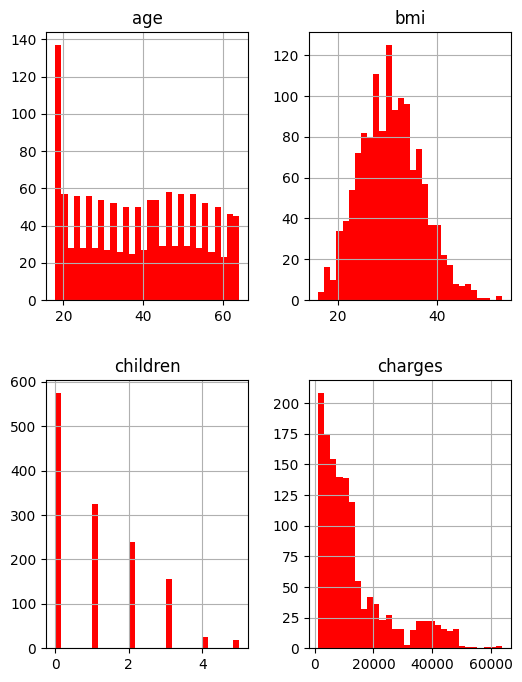

In [34]:
insurance_df[['age', 'sex', 'bmi', 'children', 'smoker', 'charges']].hist(bins = 30, figsize = (6, 8), color = 'r');


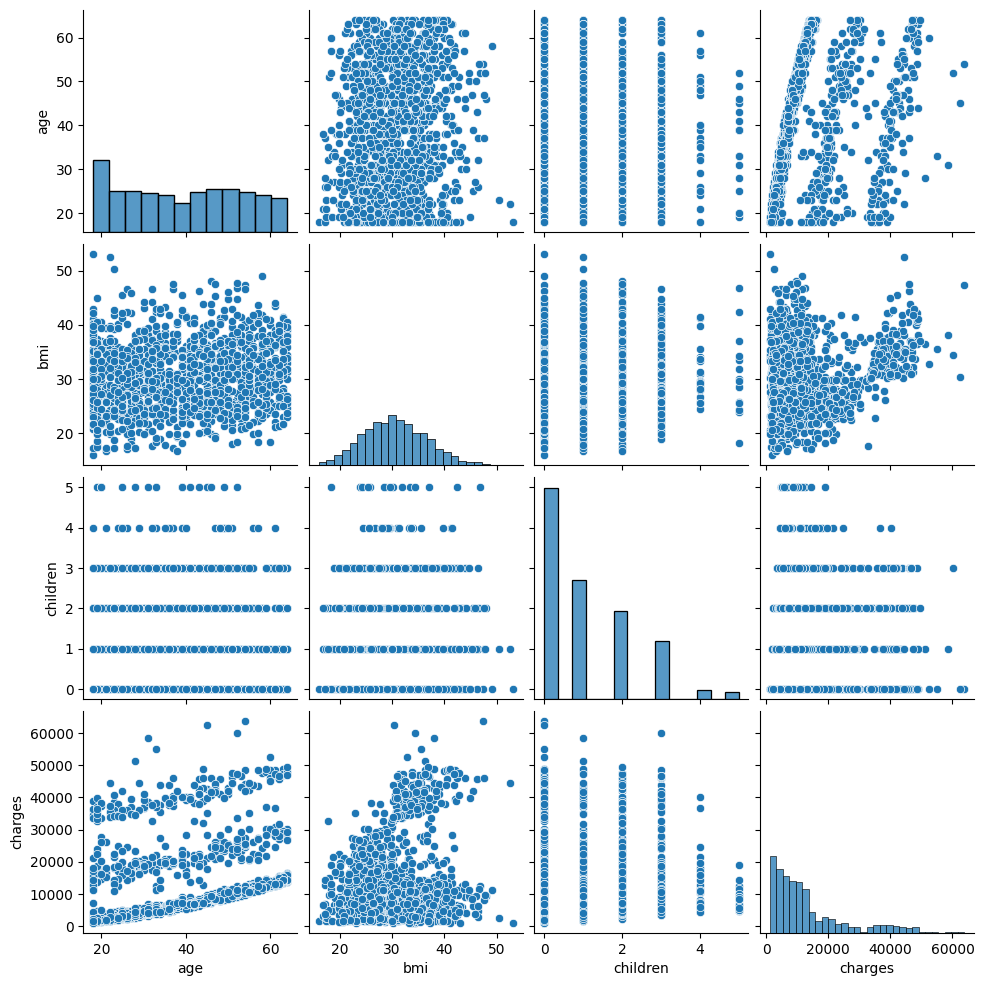

In [35]:
# plot pairplot - relationships between features 
sns.pairplot(insurance_df)

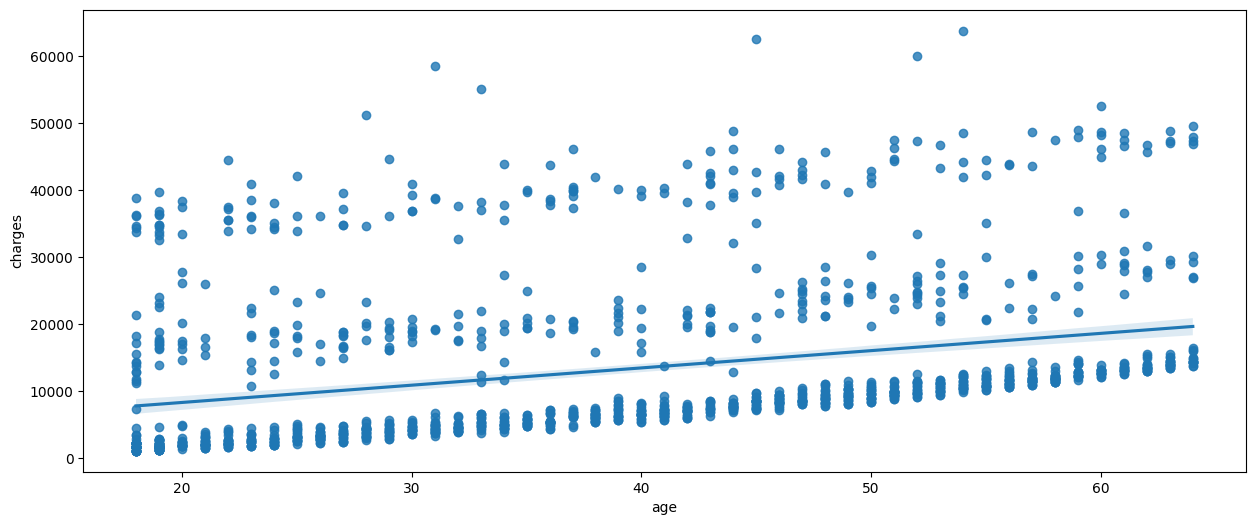

In [36]:
# quick regression / analysis of the relationship between the 'age' and the 'charges' 
plt.figure(figsize = (15, 6))
sns.regplot(x = 'age', y = 'charges', data = insurance_df)
plt.show()
  

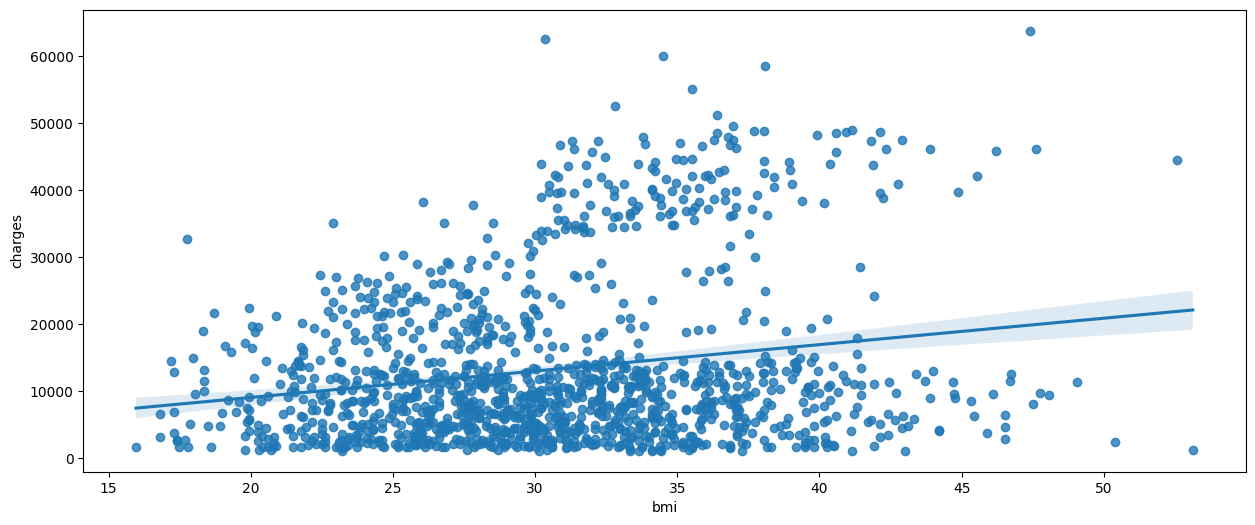

In [37]:

# quick regression / analysis of the relationship between the 'bmi' and the 'charges' 
plt.figure(figsize = (15, 6))
sns.regplot(x = 'bmi', y = 'charges', data = insurance_df)
plt.show()
  

**PRACTICE OPPORTUNITY #3 [OPTIONAL]:**
 - **Calculate and plot the correlation matrix**
 - **Which feature has the most positive correlation with charges?**

In [38]:
insurance_df.head()

age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520

In [39]:
labels = ["sex","smoker","region"]
categorical_features = insurance_df[labels]
categorical_features

sex smoker     region
0     female    yes  southwest
1       male     no  southeast
2       male     no  southeast
3       male     no  northwest
4       male     no  northwest
...      ...    ...        ...
1333    male     no  northwest
1334  female     no  northeast
1335  female     no  southeast
1336  female     no  southwest
1337  female    yes  northwest

[1338 rows x 3 columns]

In [40]:
from sklearn.preprocessing import OneHotEncoder

categorical_features.columns = categorical_features.columns.astype(str)
ohe = OneHotEncoder()
categorical_encoded = ohe.fit_transform(categorical_features)

# Create a DataFrame from the sparse matrix
categorical_columns = pd.DataFrame(
    categorical_encoded.toarray(),
    columns=ohe.get_feature_names_out(input_features=categorical_features.columns)
)

In [41]:
categorical_columns.head()

sex_female  sex_male  smoker_no  smoker_yes  region_northeast  \
0         1.0       0.0        0.0         1.0               0.0   
1         0.0       1.0        1.0         0.0               0.0   
2         0.0       1.0        1.0         0.0               0.0   
3         0.0       1.0        1.0         0.0               0.0   
4         0.0       1.0        1.0         0.0               0.0   

   region_northwest  region_southeast  region_southwest  
0               0.0               0.0               1.0  
1               0.0               1.0               0.0  
2               0.0               1.0               0.0  
3               1.0               0.0               0.0  
4               1.0               0.0               0.0

In [42]:
encoded_insurance_df = pd.concat([categorical_columns, insurance_df], axis =1)

In [43]:
encoded_insurance_df
insurance_ohe_df = encoded_insurance_df.drop(["sex","smoker","region"], axis = "columns")

<Axes: >

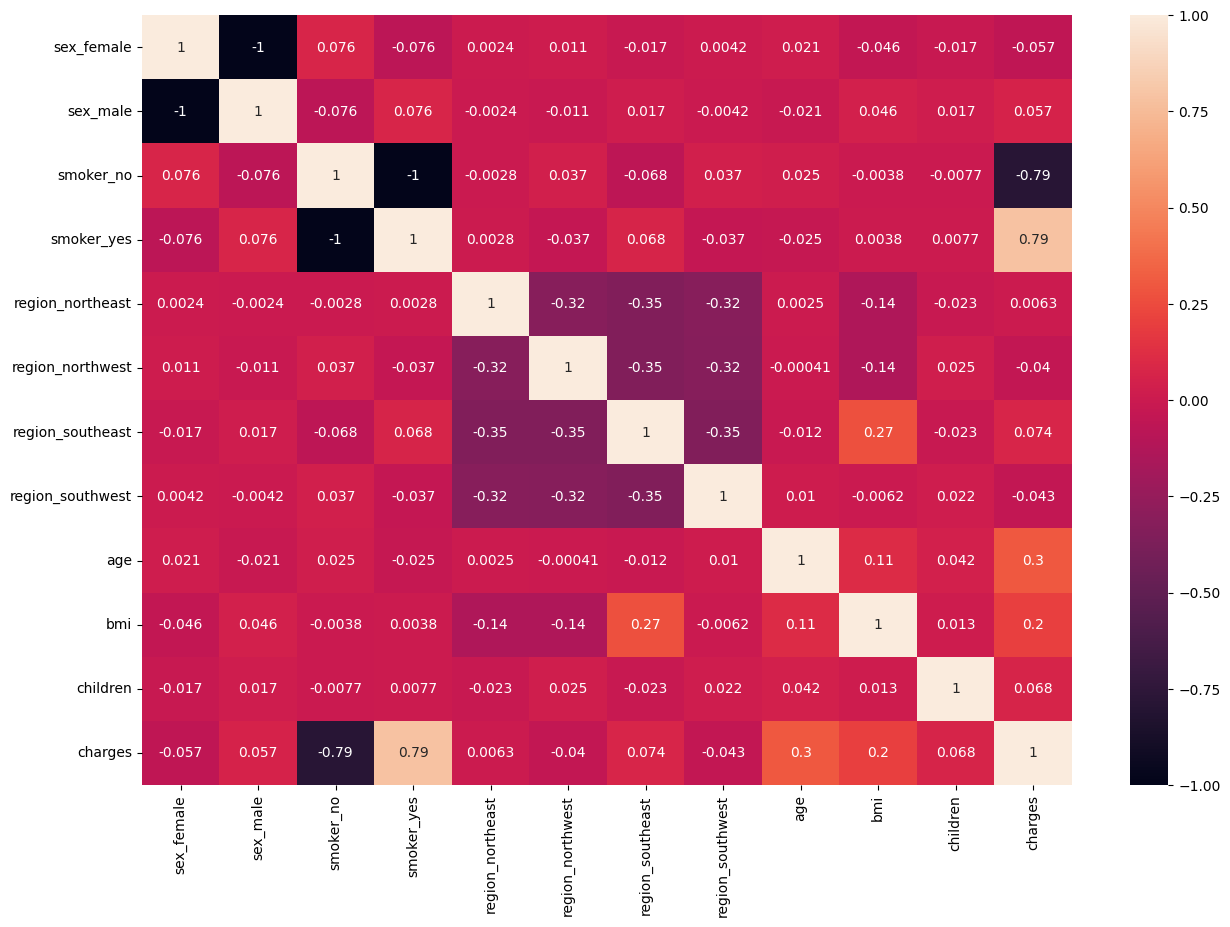

In [44]:
plt.figure(figsize = (15,10))
sns.heatmap(insurance_ohe_df.corr(), annot= True)

# CODING TASK #4: TRAIN MULTIPLE MODELS USING AUTOGLUON

In [45]:
# Split the data into 80% for training and 20% for testing using train_test_split
from sklearn.model_selection import train_test_split
X_train, X_test = train_test_split(insurance_ohe_df, test_size=0.2, random_state=0)
# https://stackoverflow.com/a/59859477 - re. Random State
# Notice no y_test, y_train | Inputs and outputs will be in one pd dataframe -> 
# Entire pandas Df is passed on as training data, charges to be used as output 


In [46]:
X_train

sex_female  sex_male  smoker_no  smoker_yes  region_northeast  \
621          0.0       1.0        0.0         1.0               0.0   
194          0.0       1.0        1.0         0.0               0.0   
240          1.0       0.0        0.0         1.0               1.0   
1168         0.0       1.0        1.0         0.0               0.0   
1192         1.0       0.0        1.0         0.0               1.0   
...          ...       ...        ...         ...               ...   
763          0.0       1.0        1.0         0.0               1.0   
835          0.0       1.0        1.0         0.0               0.0   
1216         0.0       1.0        1.0         0.0               0.0   
559          0.0       1.0        1.0         0.0               0.0   
684          1.0       0.0        1.0         0.0               0.0   

      region_northwest  region_southeast  region_southwest  age     bmi  \
621                0.0               0.0               1.0   37  34.100   
194                0.0               1.0               0.0   18  34.430   
240                0.0               0.0               0.0   23  36.670   
1168               0.0               0.0               1.0   32  35.200   
1192               0.0               0.0               0.0   58  32.395   
...                ...               ...               ...  ...     ...   
763                0.0               0.0               0.0   27  26.030   
835                0.0               1.0               0.0   42  35.970   
1216               0.0               1.0               0.0   40  25.080   
559                1.0               0.0               0.0   19  35.530   
684                0.0               0.0               1.0   33  18.500   

      children      charges  
621          4  40182.24600  
194          0   1137.46970  
240          2  38511.62830  
1168         2   4670.64000  
1192         1  13019.16105  
...        ...          ...  
763          0   3070.80870  
835          2   7160.33030  
1216         0   5415.66120  
559          0   1646.42970  
684          1   4766.02200  

[1070 rows x 12 columns]

In [47]:
# test = remaining 20% of the data (268 rows)
X_test 

sex_female  sex_male  smoker_no  smoker_yes  region_northeast  \
578          0.0       1.0        1.0         0.0               0.0   
610          1.0       0.0        1.0         0.0               0.0   
569          0.0       1.0        0.0         1.0               0.0   
1034         0.0       1.0        1.0         0.0               0.0   
198          1.0       0.0        1.0         0.0               0.0   
...          ...       ...        ...         ...               ...   
1084         1.0       0.0        1.0         0.0               0.0   
726          0.0       1.0        1.0         0.0               0.0   
1132         0.0       1.0        1.0         0.0               1.0   
725          1.0       0.0        0.0         1.0               0.0   
963          0.0       1.0        1.0         0.0               1.0   

      region_northwest  region_southeast  region_southwest  age     bmi  \
578                0.0               0.0               1.0   52  30.200   
610                0.0               1.0               0.0   47  29.370   
569                1.0               0.0               0.0   48  40.565   
1034               1.0               0.0               0.0   61  38.380   
198                1.0               0.0               0.0   51  18.050   
...                ...               ...               ...  ...     ...   
1084               1.0               0.0               0.0   62  30.495   
726                1.0               0.0               0.0   41  28.405   
1132               0.0               0.0               0.0   57  40.280   
725                0.0               1.0               0.0   30  39.050   
963                0.0               0.0               0.0   46  24.795   

      children      charges  
578          1   9724.53000  
610          1   8547.69130  
569          2  45702.02235  
1034         0  12950.07120  
198          0   9644.25250  
...        ...          ...  
1084         2  15019.76005  
726          1   6664.68595  
1132         0  20709.02034  
725          3  40932.42950  
963          3   9500.57305  

[268 rows x 12 columns]

In [48]:
# Train multiple ML regression models using AutoGluon
# You need to specify the target column, train_data, limit_time, and presets 
# Note that AutoGluon automatically detects if the problem is classification or regression type problems from the 'label' column
# For regression type problems, 'label' values are generally floating point non-integers with large number of unique values

# https://auto.gluon.ai/stable/api/autogluon.tabular.models.html

predictor = TabularPredictor(label="charges", problem_type = 'regression', eval_metric = 'r2').fit(train_data = X_train, time_limit = 200, presets = "best_quality")

No path specified. Models will be saved in: "AutogluonModels/ag-20250414_161059"
Verbosity: 2 (Standard Logging)
=================== System Info ===================
AutoGluon Version:  1.2
Python Version:     3.11.12
Operating System:   Darwin
Platform Machine:   arm64
Platform Version:   Darwin Kernel Version 24.3.0: Thu Jan  2 20:24:22 PST 2025; root:xnu-11215.81.4~3/RELEASE_ARM64_T6041
CPU Count:          14
Memory Avail:       8.66 GB / 24.00 GB (36.1%)
Disk Space Avail:   788.51 GB / 926.35 GB (85.1%)
Presets specified: ['best_quality']
Setting dynamic_stacking from 'auto' to True. Reason: Enable dynamic_stacking when use_bag_holdout is disabled. (use_bag_holdout=False)
Stack configuration (auto_stack=True): num_stack_levels=1, num_bag_folds=8, num_bag_sets=1
DyStack is enabled (dynamic_stacking=True). AutoGluon will try to determine whether the input data is affected by stacked overfitting and enable or disable stacking as a consequence.
	This is used to identify the optimal `num

(_ray_fit pid=56883) [1000]	valid_set's l2: 1.55249e+07	valid_set's r2: 0.866069


(_ray_fit pid=56878) 	Ran out of time, early stopping on iteration 1771. Best iteration is:
(_ray_fit pid=56878) 	[1769]	valid_set's l2: 1.72599e+07	valid_set's r2: 0.883561
(_dystack pid=56736) 	0.841	 = Validation score   (r2)
(_dystack pid=56736) 	0.46s	 = Training   runtime
(_dystack pid=56736) 	0.04s	 = Validation runtime
(_dystack pid=56736) Fitting model: WeightedEnsemble_L2 ... Training model for up to 48.52s of the 15.13s of remaining time.
(_dystack pid=56736) 	Ensemble Weights: {'NeuralNetTorch_BAG_L1': 0.5, 'LightGBM_BAG_L1': 0.278, 'RandomForestMSE_BAG_L1': 0.111, 'NeuralNetFastAI_BAG_L1': 0.111}
(_dystack pid=56736) 	0.8529	 = Validation score   (r2)
(_dystack pid=56736) 	0.02s	 = Training   runtime
(_dystack pid=56736) 	0.0s	 = Validation runtime
(_dystack pid=56736) Fitting 106 L2 models, fit_strategy="sequential" ...
(_dystack pid=56736) Fitting model: LightGBMXT_BAG_L2 ... Training model for up to 15.10s of the 15.08s of remaining time.
(_dystack pid=56736) 	Fitting 8

In [99]:
predictor.fit_summary()

*** Summary of fit() ***
Estimated performance of each model:
                          model  score_val eval_metric  pred_time_val   fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0           WeightedEnsemble_L3   0.856236          r2       0.543908  29.846282                0.000250           0.047715            3       True         59
1           WeightedEnsemble_L2   0.853370          r2       0.108783  13.028901                0.000223           0.044621            2       True         43
2     NeuralNetTorch_r79_BAG_L2   0.852770          r2       0.358990  24.536448                0.038319           5.982051            2       True         54
3               CatBoost_BAG_L2   0.848883          r2       0.328593  21.481310                0.007922           2.926913            2       True         47
4         NeuralNetTorch_BAG_L2   0.848369          r2       0.358927  23.328004                0.038256           4.773606            2       

/Users/christopherharris/Development/MachineLearning/OneWeekDS/.venv/lib/python3.11/site-packages/autogluon/core/utils/plots.py:169: UserWarning: AutoGluon summary plots cannot be created because bokeh is not installed. To see plots, please do: "pip install bokeh==2.0.1"
  warnings.warn('AutoGluon summary plots cannot be created because bokeh is not installed. To see plots, please do: "pip install bokeh==2.0.1"')


{'model_types': {'KNeighborsUnif_BAG_L1': 'StackerEnsembleModel_KNN',
  'KNeighborsDist_BAG_L1': 'StackerEnsembleModel_KNN',
  'LightGBMXT_BAG_L1': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L1': 'StackerEnsembleModel_LGB',
  'RandomForestMSE_BAG_L1': 'StackerEnsembleModel_RF',
  'CatBoost_BAG_L1': 'StackerEnsembleModel_CatBoost',
  'ExtraTreesMSE_BAG_L1': 'StackerEnsembleModel_XT',
  'NeuralNetFastAI_BAG_L1': 'StackerEnsembleModel_NNFastAiTabular',
  'XGBoost_BAG_L1': 'StackerEnsembleModel_XGBoost',
  'NeuralNetTorch_BAG_L1': 'StackerEnsembleModel_TabularNeuralNetTorch',
  'LightGBMLarge_BAG_L1': 'StackerEnsembleModel_LGB',
  'CatBoost_r177_BAG_L1': 'StackerEnsembleModel_CatBoost',
  'NeuralNetTorch_r79_BAG_L1': 'StackerEnsembleModel_TabularNeuralNetTorch',
  'LightGBM_r131_BAG_L1': 'StackerEnsembleModel_LGB',
  'NeuralNetFastAI_r191_BAG_L1': 'StackerEnsembleModel_NNFastAiTabular',
  'CatBoost_r9_BAG_L1': 'StackerEnsembleModel_CatBoost',
  'LightGBM_r96_BAG_L1': 'StackerEnsembleModel

In [50]:
preidctor_500 = TabularPredictor(label="charges", problem_type = 'regression', eval_metric = 'r2').fit(train_data = X_train, time_limit = 500, presets = "best_quality")

No path specified. Models will be saved in: "AutogluonModels/ag-20250414_161727"
Verbosity: 2 (Standard Logging)
=================== System Info ===================
AutoGluon Version:  1.2
Python Version:     3.11.12
Operating System:   Darwin
Platform Machine:   arm64
Platform Version:   Darwin Kernel Version 24.3.0: Thu Jan  2 20:24:22 PST 2025; root:xnu-11215.81.4~3/RELEASE_ARM64_T6041
CPU Count:          14
Memory Avail:       8.80 GB / 24.00 GB (36.7%)
Disk Space Avail:   787.94 GB / 926.35 GB (85.1%)
Presets specified: ['best_quality']
Setting dynamic_stacking from 'auto' to True. Reason: Enable dynamic_stacking when use_bag_holdout is disabled. (use_bag_holdout=False)
Stack configuration (auto_stack=True): num_stack_levels=1, num_bag_folds=8, num_bag_sets=1
DyStack is enabled (dynamic_stacking=True). AutoGluon will try to determine whether the input data is affected by stacked overfitting and enable or disable stacking as a consequence.
	This is used to identify the optimal `num

In [51]:
preidctor_500.fit_summary()

*** Summary of fit() ***
Estimated performance of each model:
                           model  score_val eval_metric  pred_time_val   fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0            WeightedEnsemble_L3   0.858131          r2       0.501227  32.936513                0.000183           0.041968            3       True        139
1            WeightedEnsemble_L2   0.855478          r2       0.121493  12.020411                0.000218           0.044435            2       True        103
2      NeuralNetTorch_r79_BAG_L2   0.853663          r2       0.353143  23.156496                0.037333           5.609668            2       True        114
3      NeuralNetTorch_r86_BAG_L2   0.852381          r2       0.354764  21.667844                0.038954           4.121016            2       True        131
4    NeuralNetFastAI_r102_BAG_L2   0.852199          r2       0.346625  20.079770                0.030816           2.532942            2 

/Users/christopherharris/Development/MachineLearning/OneWeekDS/.venv/lib/python3.11/site-packages/autogluon/core/utils/plots.py:169: UserWarning: AutoGluon summary plots cannot be created because bokeh is not installed. To see plots, please do: "pip install bokeh==2.0.1"
  warnings.warn('AutoGluon summary plots cannot be created because bokeh is not installed. To see plots, please do: "pip install bokeh==2.0.1"')


{'model_types': {'KNeighborsUnif_BAG_L1': 'StackerEnsembleModel_KNN',
  'KNeighborsDist_BAG_L1': 'StackerEnsembleModel_KNN',
  'LightGBMXT_BAG_L1': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L1': 'StackerEnsembleModel_LGB',
  'RandomForestMSE_BAG_L1': 'StackerEnsembleModel_RF',
  'CatBoost_BAG_L1': 'StackerEnsembleModel_CatBoost',
  'ExtraTreesMSE_BAG_L1': 'StackerEnsembleModel_XT',
  'NeuralNetFastAI_BAG_L1': 'StackerEnsembleModel_NNFastAiTabular',
  'XGBoost_BAG_L1': 'StackerEnsembleModel_XGBoost',
  'NeuralNetTorch_BAG_L1': 'StackerEnsembleModel_TabularNeuralNetTorch',
  'LightGBMLarge_BAG_L1': 'StackerEnsembleModel_LGB',
  'CatBoost_r177_BAG_L1': 'StackerEnsembleModel_CatBoost',
  'NeuralNetTorch_r79_BAG_L1': 'StackerEnsembleModel_TabularNeuralNetTorch',
  'LightGBM_r131_BAG_L1': 'StackerEnsembleModel_LGB',
  'NeuralNetFastAI_r191_BAG_L1': 'StackerEnsembleModel_NNFastAiTabular',
  'CatBoost_r9_BAG_L1': 'StackerEnsembleModel_CatBoost',
  'LightGBM_r96_BAG_L1': 'StackerEnsembleModel

# CODING TASK #5: EVALUATE TRAINED MODELS PERFORMANCE

In [55]:
predictor.leaderboard().head(10)

model  score_val eval_metric  pred_time_val   fit_time  \
0        WeightedEnsemble_L3   0.855473          r2       0.544768  32.649160   
1        WeightedEnsemble_L2   0.853423          r2       0.102324  12.400044   
2      NeuralNetTorch_BAG_L2   0.850122          r2       0.354188  25.781265   
3  NeuralNetTorch_r79_BAG_L2   0.849793          r2       0.355796  20.524729   
4            CatBoost_BAG_L2   0.849136          r2       0.325921  34.442722   
5       CatBoost_r177_BAG_L2   0.847382          r2       0.324306  20.378536   
6      NeuralNetTorch_BAG_L1   0.847323          r2       0.019452   5.568136   
7        CatBoost_r50_BAG_L1   0.847290          r2       0.003413   0.637708   
8  NeuralNetTorch_r86_BAG_L1   0.847279          r2       0.021491   4.224224   
9  NeuralNetTorch_r30_BAG_L1   0.847237          r2       0.023668   5.955038   

   pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  \
0                0.000267           0.047249            3       True   
1                0.000199           0.042997            2       True   
2                0.037552           7.757231            2       True   
3                0.039159           2.500696            2       True   
4                0.009284          16.418689            2       True   
5                0.007669           2.354502            2       True   
6                0.019452           5.568136            1       True   
7                0.003413           0.637708            1       True   
8                0.021491           4.224224            1       True   
9                0.023668           5.955038            1       True   

   fit_order  
0         58  
1         46  
2         54  
3         57  
4         50  
5         56  
6         10  
7         31  
8         30  
9         28

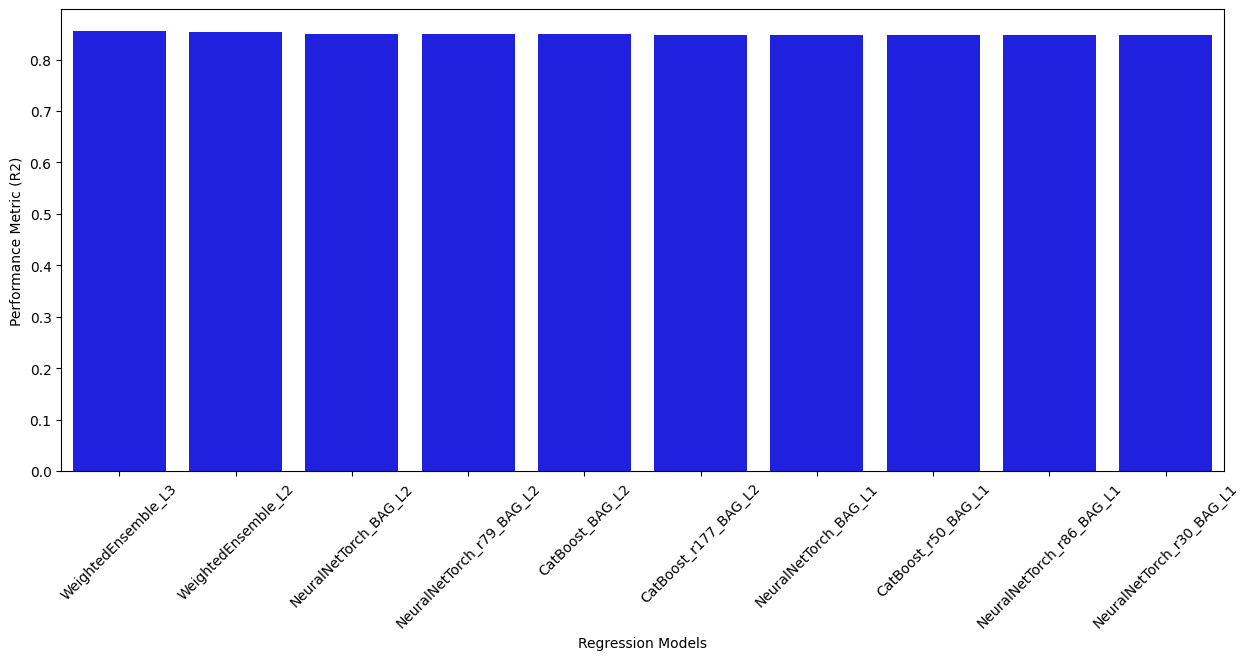

In [67]:
# Initialize the matplotlib figure - top 10 
f, ax = plt.subplots(figsize = (15, 6))
sns.barplot(x = "model", y = "score_val", data = predictor.leaderboard().head(10), color = "b")
ax.set(ylabel = "Performance Metric (R2)", xlabel = "Regression Models")
plt.xticks(rotation = 45);

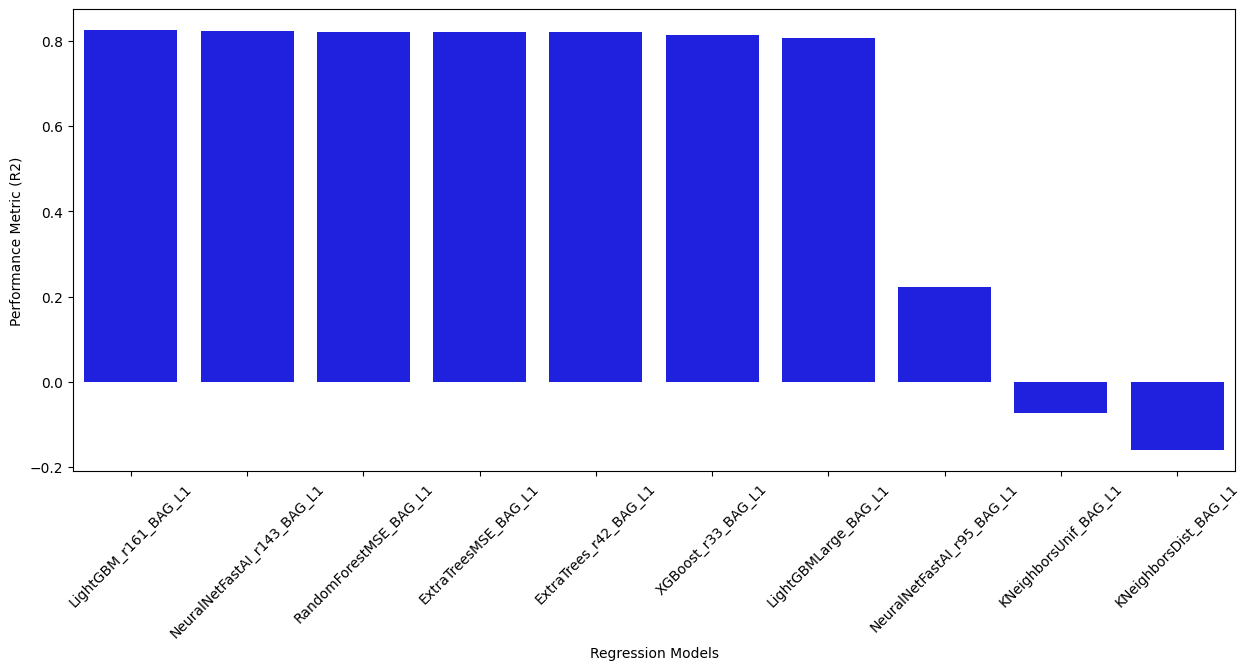

In [68]:
# Initialize the matplotlib figure - bottom 10
f, ax = plt.subplots(figsize = (15, 6))
sns.barplot(x = "model", y = "score_val", data = predictor.leaderboard().tail(10), color = "b")
ax.set(ylabel = "Performance Metric (R2)", xlabel = "Regression Models")
plt.xticks(rotation = 45);

In [74]:
predictor.evaluate(X_test)

/Users/christopherharris/Development/MachineLearning/OneWeekDS/.venv/lib/python3.11/site-packages/fastai/learner.py:455: UserWarning: load_learner` uses Python's insecure pickle module, which can execute malicious arbitrary code when loading. Only load files you trust.
If you only need to load model weights and optimizer state, use the safe `Learner.load` instead.
  warn("load_learner` uses Python's insecure pickle module, which can execute malicious arbitrary code when loading. Only load files you trust.\nIf you only need to load model weights and optimizer state, use the safe `Learner.load` instead.")
/Users/christopherharris/Development/MachineLearning/OneWeekDS/.venv/lib/python3.11/site-packages/fastai/learner.py:455: UserWarning: load_learner` uses Python's insecure pickle module, which can execute malicious arbitrary code when loading. Only load files you trust.
If you only need to load model weights and optimizer state, use the safe `Learner.load` instead.
  warn("load_learner` 

{'r2': 0.9063909095102219,
 'root_mean_squared_error': -3859.535081152499,
 'mean_squared_error': -14896011.042646827,
 'mean_absolute_error': -2093.820965190998,
 'pearsonr': 0.9521670825429188,
 'median_absolute_error': -1179.5072628906255}

In [73]:
preidctor_500.evaluate(X_test)

/Users/christopherharris/Development/MachineLearning/OneWeekDS/.venv/lib/python3.11/site-packages/fastai/learner.py:455: UserWarning: load_learner` uses Python's insecure pickle module, which can execute malicious arbitrary code when loading. Only load files you trust.
If you only need to load model weights and optimizer state, use the safe `Learner.load` instead.
  warn("load_learner` uses Python's insecure pickle module, which can execute malicious arbitrary code when loading. Only load files you trust.\nIf you only need to load model weights and optimizer state, use the safe `Learner.load` instead.")
/Users/christopherharris/Development/MachineLearning/OneWeekDS/.venv/lib/python3.11/site-packages/fastai/learner.py:455: UserWarning: load_learner` uses Python's insecure pickle module, which can execute malicious arbitrary code when loading. Only load files you trust.
If you only need to load model weights and optimizer state, use the safe `Learner.load` instead.
  warn("load_learner` 

{'r2': 0.9072182511282464,
 'root_mean_squared_error': -3842.441437698573,
 'mean_squared_error': -14764356.202143075,
 'mean_absolute_error': -2041.9255093840948,
 'pearsonr': 0.9525155410012981,
 'median_absolute_error': -1122.0529984374998}

In [75]:
# assess model performance
# Pick 5 test datasets and generate predictions
y_pred = predictor.predict(X_test)
print("Predictions:  ", list(y_pred)[:5])

/Users/christopherharris/Development/MachineLearning/OneWeekDS/.venv/lib/python3.11/site-packages/fastai/learner.py:455: UserWarning: load_learner` uses Python's insecure pickle module, which can execute malicious arbitrary code when loading. Only load files you trust.
If you only need to load model weights and optimizer state, use the safe `Learner.load` instead.
  warn("load_learner` uses Python's insecure pickle module, which can execute malicious arbitrary code when loading. Only load files you trust.\nIf you only need to load model weights and optimizer state, use the safe `Learner.load` instead.")
/Users/christopherharris/Development/MachineLearning/OneWeekDS/.venv/lib/python3.11/site-packages/fastai/learner.py:455: UserWarning: load_learner` uses Python's insecure pickle module, which can execute malicious arbitrary code when loading. Only load files you trust.
If you only need to load model weights and optimizer state, use the safe `Learner.load` instead.
  warn("load_learner` 

Predictions:   [11757.578125, 9623.15234375, 45728.234375, 14313.486328125, 10797.154296875]


In [76]:
X_test

sex_female  sex_male  smoker_no  smoker_yes  region_northeast  \
578          0.0       1.0        1.0         0.0               0.0   
610          1.0       0.0        1.0         0.0               0.0   
569          0.0       1.0        0.0         1.0               0.0   
1034         0.0       1.0        1.0         0.0               0.0   
198          1.0       0.0        1.0         0.0               0.0   
...          ...       ...        ...         ...               ...   
1084         1.0       0.0        1.0         0.0               0.0   
726          0.0       1.0        1.0         0.0               0.0   
1132         0.0       1.0        1.0         0.0               1.0   
725          1.0       0.0        0.0         1.0               0.0   
963          0.0       1.0        1.0         0.0               1.0   

      region_northwest  region_southeast  region_southwest  age     bmi  \
578                0.0               0.0               1.0   52  30.200   
610                0.0               1.0               0.0   47  29.370   
569                1.0               0.0               0.0   48  40.565   
1034               1.0               0.0               0.0   61  38.380   
198                1.0               0.0               0.0   51  18.050   
...                ...               ...               ...  ...     ...   
1084               1.0               0.0               0.0   62  30.495   
726                1.0               0.0               0.0   41  28.405   
1132               0.0               0.0               0.0   57  40.280   
725                0.0               1.0               0.0   30  39.050   
963                0.0               0.0               0.0   46  24.795   

      children      charges  
578          1   9724.53000  
610          1   8547.69130  
569          2  45702.02235  
1034         0  12950.07120  
198          0   9644.25250  
...        ...          ...  
1084         2  15019.76005  
726          1   6664.68595  
1132         0  20709.02034  
725          3  40932.42950  
963          3   9500.57305  

[268 rows x 12 columns]

In [77]:
y_test = X_test['charges']
y_test #groundtruth

578      9724.53000
610      8547.69130
569     45702.02235
1034    12950.07120
198      9644.25250
           ...     
1084    15019.76005
726      6664.68595
1132    20709.02034
725     40932.42950
963      9500.57305
Name: charges, Length: 268, dtype: float64

/Users/christopherharris/Development/MachineLearning/OneWeekDS/.venv/lib/python3.11/site-packages/fastai/learner.py:455: UserWarning: load_learner` uses Python's insecure pickle module, which can execute malicious arbitrary code when loading. Only load files you trust.
If you only need to load model weights and optimizer state, use the safe `Learner.load` instead.
  warn("load_learner` uses Python's insecure pickle module, which can execute malicious arbitrary code when loading. Only load files you trust.\nIf you only need to load model weights and optimizer state, use the safe `Learner.load` instead.")
/Users/christopherharris/Development/MachineLearning/OneWeekDS/.venv/lib/python3.11/site-packages/fastai/learner.py:455: UserWarning: load_learner` uses Python's insecure pickle module, which can execute malicious arbitrary code when loading. Only load files you trust.
If you only need to load model weights and optimizer state, use the safe `Learner.load` instead.
  warn("load_learner` 

Text(0.5, 0, 'True Values')

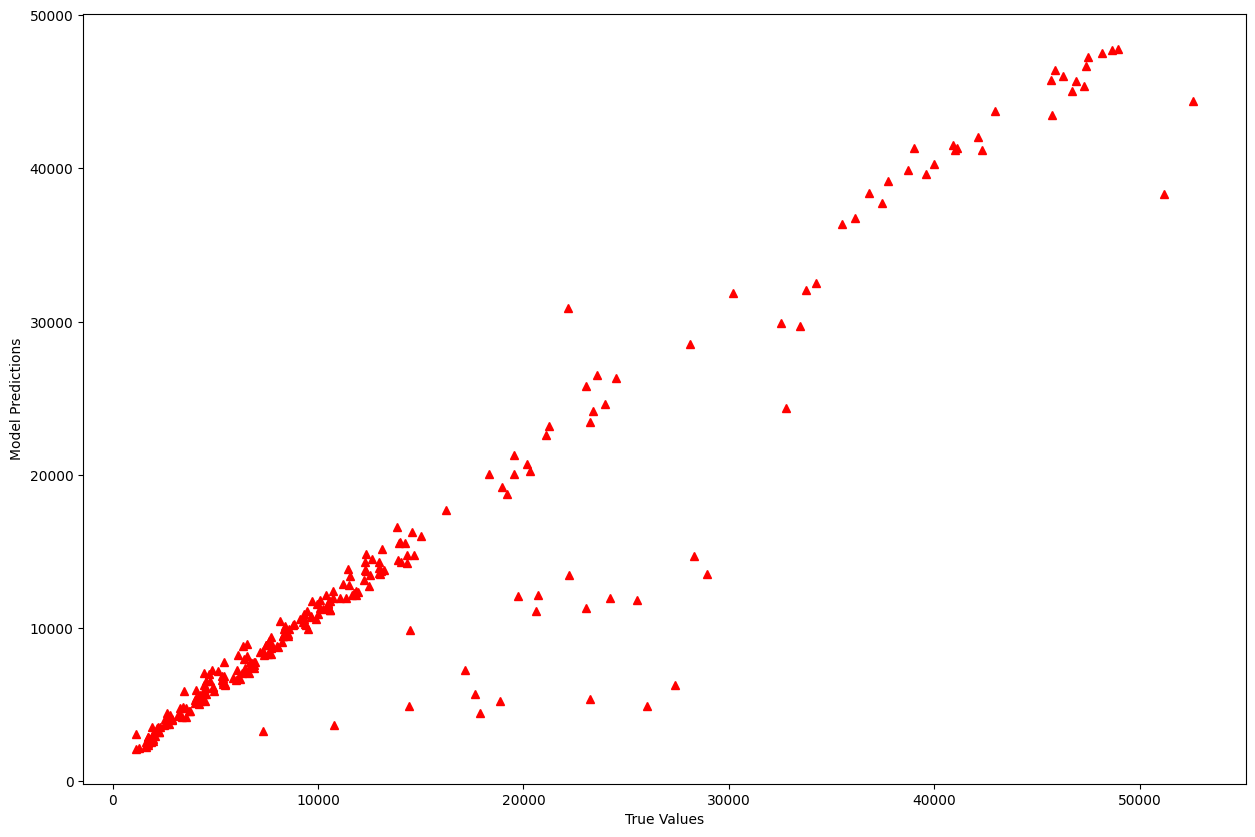

In [78]:
y_predict = predictor.predict(X_test)
plt.figure(figsize = (15, 10))
plt.plot(y_test, y_predict, "^", color = 'r')
plt.ylabel('Model Predictions')
plt.xlabel('True Values')

In [79]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from math import sqrt

RMSE = float(format(np.sqrt(mean_squared_error(y_test, y_predict)),'.3f'))
MSE = mean_squared_error(y_test, y_predict)
MAE = mean_absolute_error(y_test, y_predict)
r2 = r2_score(y_test, y_predict)

print('RMSE =',RMSE, '\nMSE =',MSE, '\nMAE =',MAE, '\nR2 =', r2) 

RMSE = 3859.535 
MSE = 14896011.042646827 
MAE = 2093.820965190998 
R2 = 0.9063909095102219


**PRACTICE OPPORTUNITY #4 [OPTIONAL]:**
- **Retrain a regressor model using AutoGluon with different preset value**
- **Set the limit_time to 300 secs**
- **Use RMSE as the key metric and plot the barchart**
- **Which model provides the best performance?**
- **Assess trained model performance by comparing various metrics**

In [80]:
predictor_rsme = TabularPredictor(label="charges", problem_type = 'regression', eval_metric = 'root_mean_squared_error').fit(train_data = X_train, time_limit = 300, presets = "best_quality")


No path specified. Models will be saved in: "AutogluonModels/ag-20250414_181704"
Verbosity: 2 (Standard Logging)
=================== System Info ===================
AutoGluon Version:  1.2
Python Version:     3.11.12
Operating System:   Darwin
Platform Machine:   arm64
Platform Version:   Darwin Kernel Version 24.3.0: Thu Jan  2 20:24:22 PST 2025; root:xnu-11215.81.4~3/RELEASE_ARM64_T6041
CPU Count:          14
Memory Avail:       8.25 GB / 24.00 GB (34.4%)
Disk Space Avail:   786.07 GB / 926.35 GB (84.9%)
Presets specified: ['best_quality']
Setting dynamic_stacking from 'auto' to True. Reason: Enable dynamic_stacking when use_bag_holdout is disabled. (use_bag_holdout=False)
Stack configuration (auto_stack=True): num_stack_levels=1, num_bag_folds=8, num_bag_sets=1
DyStack is enabled (dynamic_stacking=True). AutoGluon will try to determine whether the input data is affected by stacked overfitting and enable or disable stacking as a consequence.
	This is used to identify the optimal `num

In [82]:
predictor_rsme.leaderboard().head(10)
#score_val is in the same value as the target variable i.e. $dollars 
# example, model WeightedEnsemble_l3 is around $4496 dollars deviation away from the actual

model    score_val              eval_metric  \
0          WeightedEnsemble_L3 -4496.828002  root_mean_squared_error   
1          WeightedEnsemble_L2 -4558.152412  root_mean_squared_error   
2    NeuralNetTorch_r79_BAG_L2 -4592.652459  root_mean_squared_error   
3         CatBoost_r137_BAG_L2 -4598.674630  root_mean_squared_error   
4              CatBoost_BAG_L2 -4606.408285  root_mean_squared_error   
5    NeuralNetTorch_r41_BAG_L1 -4610.424350  root_mean_squared_error   
6         CatBoost_r177_BAG_L2 -4620.883324  root_mean_squared_error   
7    NeuralNetTorch_r22_BAG_L2 -4623.578424  root_mean_squared_error   
8  NeuralNetFastAI_r102_BAG_L2 -4625.198878  root_mean_squared_error   
9            LightGBMXT_BAG_L2 -4652.904668  root_mean_squared_error   

   pred_time_val   fit_time  pred_time_val_marginal  fit_time_marginal  \
0       0.665071  38.508096                0.000145           0.005579   
1       0.127587  21.943524                0.000124           0.005433   
2       0.371945  32.478254                0.039591           5.067051   
3       0.340692  29.304850                0.008338           1.893647   
4       0.340641  30.398719                0.008286           2.987515   
5       0.020612   4.781872                0.020612           4.781872   
6       0.340420  30.383439                0.008065           2.972236   
7       0.373419  34.945937                0.041065           7.534734   
8       0.364375  30.149009                0.032021           2.737806   
9       0.542931  29.744586                0.210577           2.333383   

   stack_level  can_infer  fit_order  
0            3       True         83  
1            2       True         62  
2            2       True         73  
3            2       True         81  
4            2       True         66  
5            1       True         46  
6            2       True         72  
7            2       True         78  
8            2       True         82  
9            2       True         63

In [86]:
# assess model performance
# Pick 5 test datasets and generate predictions
y_pred = predictor_rsme.predict(X_test)
print("Predictions:  ", list(y_pred)[:5])
# Predictions:   [12184.439453125, 9500.6357421875, 45846.9140625, 13858.79296875, 10508.2060546875]

/Users/christopherharris/Development/MachineLearning/OneWeekDS/.venv/lib/python3.11/site-packages/fastai/learner.py:455: UserWarning: load_learner` uses Python's insecure pickle module, which can execute malicious arbitrary code when loading. Only load files you trust.
If you only need to load model weights and optimizer state, use the safe `Learner.load` instead.
  warn("load_learner` uses Python's insecure pickle module, which can execute malicious arbitrary code when loading. Only load files you trust.\nIf you only need to load model weights and optimizer state, use the safe `Learner.load` instead.")
/Users/christopherharris/Development/MachineLearning/OneWeekDS/.venv/lib/python3.11/site-packages/fastai/learner.py:455: UserWarning: load_learner` uses Python's insecure pickle module, which can execute malicious arbitrary code when loading. Only load files you trust.
If you only need to load model weights and optimizer state, use the safe `Learner.load` instead.
  warn("load_learner` 

Predictions:   [12184.439453125, 9500.6357421875, 45846.9140625, 13858.79296875, 10508.2060546875]


/Users/christopherharris/Development/MachineLearning/OneWeekDS/.venv/lib/python3.11/site-packages/fastai/learner.py:455: UserWarning: load_learner` uses Python's insecure pickle module, which can execute malicious arbitrary code when loading. Only load files you trust.
If you only need to load model weights and optimizer state, use the safe `Learner.load` instead.
  warn("load_learner` uses Python's insecure pickle module, which can execute malicious arbitrary code when loading. Only load files you trust.\nIf you only need to load model weights and optimizer state, use the safe `Learner.load` instead.")
/Users/christopherharris/Development/MachineLearning/OneWeekDS/.venv/lib/python3.11/site-packages/fastai/learner.py:455: UserWarning: load_learner` uses Python's insecure pickle module, which can execute malicious arbitrary code when loading. Only load files you trust.
If you only need to load model weights and optimizer state, use the safe `Learner.load` instead.
  warn("load_learner` 

In [88]:
predictor_rsme.fit_summary()

*** Summary of fit() ***
Estimated performance of each model:
                          model     score_val              eval_metric  pred_time_val   fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0           WeightedEnsemble_L3  -4496.828002  root_mean_squared_error       0.665071  38.508096                0.000145           0.005579            3       True         83
1           WeightedEnsemble_L2  -4558.152412  root_mean_squared_error       0.127587  21.943524                0.000124           0.005433            2       True         62
2     NeuralNetTorch_r79_BAG_L2  -4592.652459  root_mean_squared_error       0.371945  32.478254                0.039591           5.067051            2       True         73
3          CatBoost_r137_BAG_L2  -4598.674630  root_mean_squared_error       0.340692  29.304850                0.008338           1.893647            2       True         81
4               CatBoost_BAG_L2  -4606.408285  root_mean_square

/Users/christopherharris/Development/MachineLearning/OneWeekDS/.venv/lib/python3.11/site-packages/autogluon/core/utils/plots.py:169: UserWarning: AutoGluon summary plots cannot be created because bokeh is not installed. To see plots, please do: "pip install bokeh==2.0.1"
  warnings.warn('AutoGluon summary plots cannot be created because bokeh is not installed. To see plots, please do: "pip install bokeh==2.0.1"')


{'model_types': {'KNeighborsUnif_BAG_L1': 'StackerEnsembleModel_KNN',
  'KNeighborsDist_BAG_L1': 'StackerEnsembleModel_KNN',
  'LightGBMXT_BAG_L1': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L1': 'StackerEnsembleModel_LGB',
  'RandomForestMSE_BAG_L1': 'StackerEnsembleModel_RF',
  'CatBoost_BAG_L1': 'StackerEnsembleModel_CatBoost',
  'ExtraTreesMSE_BAG_L1': 'StackerEnsembleModel_XT',
  'NeuralNetFastAI_BAG_L1': 'StackerEnsembleModel_NNFastAiTabular',
  'XGBoost_BAG_L1': 'StackerEnsembleModel_XGBoost',
  'NeuralNetTorch_BAG_L1': 'StackerEnsembleModel_TabularNeuralNetTorch',
  'LightGBMLarge_BAG_L1': 'StackerEnsembleModel_LGB',
  'CatBoost_r177_BAG_L1': 'StackerEnsembleModel_CatBoost',
  'NeuralNetTorch_r79_BAG_L1': 'StackerEnsembleModel_TabularNeuralNetTorch',
  'LightGBM_r131_BAG_L1': 'StackerEnsembleModel_LGB',
  'NeuralNetFastAI_r191_BAG_L1': 'StackerEnsembleModel_NNFastAiTabular',
  'CatBoost_r9_BAG_L1': 'StackerEnsembleModel_CatBoost',
  'LightGBM_r96_BAG_L1': 'StackerEnsembleModel

In [87]:
X_test.head()

sex_female  sex_male  smoker_no  smoker_yes  region_northeast  \
578          0.0       1.0        1.0         0.0               0.0   
610          1.0       0.0        1.0         0.0               0.0   
569          0.0       1.0        0.0         1.0               0.0   
1034         0.0       1.0        1.0         0.0               0.0   
198          1.0       0.0        1.0         0.0               0.0   

      region_northwest  region_southeast  region_southwest  age     bmi  \
578                0.0               0.0               1.0   52  30.200   
610                0.0               1.0               0.0   47  29.370   
569                1.0               0.0               0.0   48  40.565   
1034               1.0               0.0               0.0   61  38.380   
198                1.0               0.0               0.0   51  18.050   

      children      charges  
578          1   9724.53000  
610          1   8547.69130  
569          2  45702.02235  
1034         0  12950.07120  
198          0   9644.25250

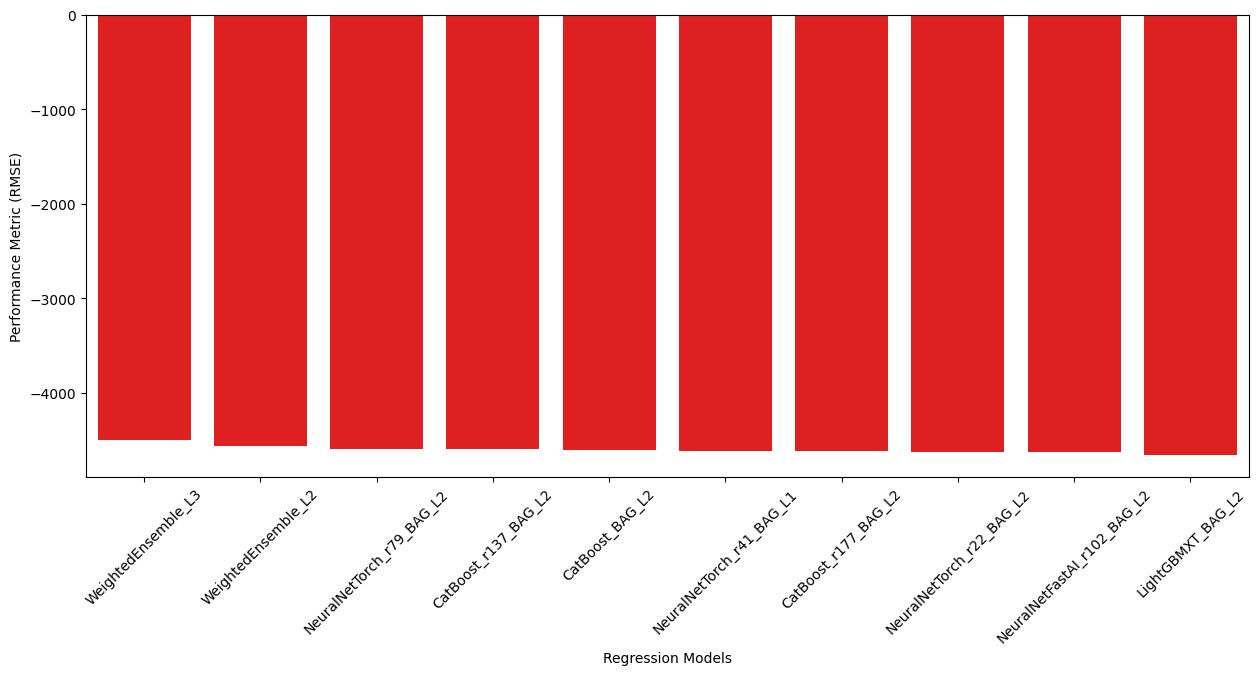

In [90]:
# Initialize the matplotlib figure - top 10 
f, ax = plt.subplots(figsize = (15, 6))
sns.barplot(x = "model", y = "score_val", data = predictor_rsme.leaderboard().head(10), color = "r")
ax.set(ylabel = "Performance Metric (RMSE)", xlabel = "Regression Models")
plt.xticks(rotation = 45);

# PRACTICE OPPORTUNITY SOLUTIONS

**PRACTICE OPPORTUNITY #1 SOLUTION:** 
- **How many unique regions do we have in the insurance_df?**

In [ ]:
insurance_df['region'].unique()

**PRACTICE OPPORTUNITY #2 SOLUTION:**
- **Group data by 'age' and examine the relationship between 'age' and 'charges'**

In [ ]:
df_age = insurance_df.groupby(by = 'age').mean()
df_age

**PRACTICE OPPORTUNITY #3 SOLUTION:**
 - **Calculate and plot the correlation matrix**
 - **Which feature has the most positive correlation with charges?**

In [ ]:
plt.figure(figsize = (15, 10))
sns.heatmap(insurance_df.corr(), annot = True);
# smoker and age have positive correlations with charges

**PRACTICE OPPORTUNITY #4 SOLUTION:**
- **Retrain a regressor model using AutoGluon with different preset value**
- **Set the limit_time to 300 secs**
- **Use RMSE as the key metric and plot the barchart**
- **Which model provides the best performance?**
- **Assess trained model performance by comparing various metrics**

In [ ]:
predictor = TabularPredictor(label="charges", problem_type = 'regression', eval_metric = 'rmse').fit(train_data = X_train, time_limit = 300, presets = "optimize_for_deployment")
predictor.fit_summary()
predictor.leaderboard()

# Initialize the matplotlib figure
f, ax = plt.subplots(figsize = (15, 6))
sns.barplot(x = "model", y = "score_val", data = predictor.leaderboard(), color = "b")
ax.set(ylabel = "Performance Metric (RMSE)", xlabel = "Regression Models")
plt.xticks(rotation = 45);

predictor.evaluate(X_test)

# FINAL CAPSTONE PROJECT 

- The objective of this project is to build, train, and test a classifier model to predict diabetes in patients using AutoGluon. This project can be effectively used by healthcare professionals to detect diabetes and understand key factors that contribute to the disease.
- Please complete the following tasks:
  - Load the “diabetes.csv” dataset
  - Perform basic Exploratory Data Analysis (EDA)
  - Using ‘best_quality’ preset and ‘accuracy’ metric, train classification models using AutoGluon to predict the “Outcome” column 
  - Evaluate trained models' performance by plotting the leaderboard and indicating the best model. Plot the confusion matrix.


# FINAL CAPSTONE PROJECT SOLUTION

# PROJECT TASK #1: IMPORT LIBRARIES AND DATASETS

In [ ]:
# Import Key Libaries and datsets
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
!pip install -U pip
!pip install -U setuptools wheel
!pip install -U "mxnet<2.0.0"
!pip install autogluon --no-cache-dir

In [ ]:
# pip install autogluon autogluon.tabular "mxnet<2.0.0"

In [ ]:
# AutoGluon is modularized into sub-modules for: 1. Tabular, 2. text, 3.Images
from autogluon.tabular import TabularDataset, TabularPredictor

In [ ]:
# Read Diabetes datsets
diabetes_df = pd.read_csv('diabetes.csv')

In [ ]:
diabetes_df

# PROJECT TASK #2: PERFORM EXPLORATORY DATA ANALYSIS AND VISUALIZATION

In [ ]:
# Explore the first five rows in the DataFrame
diabetes_df.head()

In [ ]:
# Explore the last five rows in the DataFrame
diabetes_df.tail()

In [ ]:
# Generate statistical summary
diabetes_df.describe()

In [ ]:
# Obtain dataset information
diabetes_df.info()

In [ ]:
# check if there are any Null values
sns.heatmap(diabetes_df.isnull(), yticklabels = False, cbar = False, cmap="Blues")

In [ ]:
# check if there are any Null values
diabetes_df.isnull().sum()

In [ ]:
diabetes_df.hist(bins = 30, figsize = (12, 12), color = 'r');

In [ ]:
# plot pairplot
sns.pairplot(diabetes_df, hue = 'Outcome', vars = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age'])

In [ ]:
plt.figure(figsize = (15, 10))
sns.heatmap(diabetes_df.corr(), annot = True);
# smoker and age have positive correlations with charges

In [ ]:
plt.figure(figsize = (12, 7))
sns.countplot(x = 'Outcome', data = diabetes_df)

# PROJECT TASK #3: TRAIN MULTIPLE MODELS USING AUTOGLUON

In [ ]:
# Split the data into 80% for training and 20% for testing using train_test_split
from sklearn.model_selection import train_test_split
X_train, X_test = train_test_split(diabetes_df, test_size=0.2, random_state=0)

In [ ]:
X_train

In [ ]:
X_test

In [ ]:
# Train multiple ML classifier models using AutoGluon
# You need to specify the target column, train_data, limit_time, and presets 
# Note that AutoGluon automatically detects if the problem is classification or regression type problems from the 'label' column
predictor = TabularPredictor(label="Outcome", problem_type = 'binary', eval_metric = 'accuracy').fit(train_data = X_train, time_limit = 200, presets = "best_quality")

In [ ]:
predictor.fit_summary()

# PROJECT TASK #4: EVALUATE TRAINED MODEL PERFORMANCE

In [ ]:
predictor.leaderboard()

In [ ]:
# Initialize the matplotlib figure
f, ax = plt.subplots(figsize = (15, 6))
sns.barplot(x = "model", y = "score_val", data = predictor.leaderboard(), color = "b")
ax.set(ylabel = "Performance Metric (Accuracy)", xlabel = "Classification Models")
plt.xticks(rotation = 45);


In [ ]:
predictor.evaluate(X_test)

In [ ]:
# assess model performance
# Pick 5 test datasets and generate predictions
y_pred = predictor.predict(X_test)
print("Predictions:  ", list(y_pred)[:5])

In [ ]:
y_test = X_test['Outcome']
y_test

In [ ]:
# Training set Performance
from sklearn.metrics import confusion_matrix
# Testing Set Performance
plt.figure(figsize = (12, 8))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True)


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

# GREAT JOB!